## Part 1: Creative Ideation:
1) Students: Using data from the student survey, analyze responses to determine if flipped classrooms are ideal for students and if this instruction style is ideal for future learning.

2) Students: Create a streamlined peer connection program to match students together in COMP 110 for studying, review, and conceptual help. Many students do not know others in the course and may get more help from peer connections for review, strategizing, or friendship building rather than office hours or tutoring.

3) Societal Workforce: Create projects or exercises that are directly connected to real-world scenerios or actual coding interview questions to prepare students to meet the demands of employers and excel in the workforce broadly. While COMP 110 does prepare students well already, it would be engaging for students to work on specific examples from actual firms to connect their learning to a real-world scenerio.

4) Instructional Staff: Implement multiple check-in surveys throughout the semester that offer very small amounts of extra credit as incentive to see what subjects students are confused about, what parts of the course are succeeding, or what things are not going well. COMP 110 currently has a feedback mechanism, but implementing a small incentive to gather more student data could enhance course refinement strategies and stay in-tune with students even more.

5) Acedemic Institution: Add a section to comp110.com that showcases the work of students, such as turtle drawings or other interesting projects, to advertise the cool things you can do in the course and the success of students who take it. This could encourage more students to take the course and highlight the interesting things UNC students are doing. This can improve the overall skills of students, improving their outcomes which helps UNC and helps grow their broader focus on data science.


## Part 2: Identifying Missing Data:
The potential usefulness of my second idea to create a peer connection program for COMP 110 could be tested by collecting additional student data via surveying. Students could be asked directly to rate their interest in the creation of a peer-connection program to match peers for studying, review, or networking purposes. Students could also be polled on their current level of connection with other students and their interest in networking with COMP 110 peers. These factors provide useful information for gauging the demand for a peer-connection program to weigh its potential benefits with the cost of implementation. One could factor in existing data on the usefulness of tutoring and office hours into the decision to expand course resources to see if students are satisfied with current options.

## Part 3: Choosing My Analysis:
I have chosen my first idea to analyze student responses from the flipped_class column to determine if flipped classrooms are ideal for students and if this instruction style should continue. Specifically, the survey question asked students if Tuesdays became required in-person synchronous classes, if they would be willing to watch videos and complete lessons to prepare for Tuesday's lectures. While this question inquiries about a theoretical change, it provides useful insight to students preferences for this instruction method. Currently, COMP 110 functions largely as a flipped classroom with emphasis on practice and application during our in-person lectures on Thursdays, so this question is still relevent to the current iteration of the course. This question is important for creating value because the instruction method of a course has a direct and significant impact on the learning outcomes of students. Changing the instruction method would involve a significant logistical change to the course and impact the course experience signficantly. Therefore, I will analyze this response question to understand student interest in flipped classrooms to see if this instruction method should continue, given that COMP 110 becomes fully synchronous.

In [2]:
from data_utils import read_csv_rows, columnar, head, select, count


## read_csv_rows
First, I will use the read_csv_rows function to convert the survey.csv file into a useable form in python. This function converts the csv data into a list of rows with each row being represented as a dictionary with keys and values of the string data type. We will later modify and filter the result of this function call for the purposes of our analysis.

In [3]:
data = read_csv_rows("../../data/survey.csv")

## columnar
The columnar function converts the result of read_csv_rows, a list of rows represented as dictionaries of the form `dict[str, str]`,  into a dictionary of columns with the form `dict[str, list[str]]`. The keys of this new dictionary are the headers of our survey columns (i.e. year, unc_status, comp_major, etc.) with values as lists of strings representing every value contained within that column. This modification orients our data into a column-wise orientation which is useful for the following steps in my analysis. 

In [4]:
data_rows = columnar(data)

## head
The head function produces a column-oriented table of the form `dict[str, list[str]]`, derived from the previous two functions, with only the N (parameter) first rows for each column. This function is useful in our analysis for taking a smaller look into our entries for flipped_class to get a general glimpse rather than observing every entry.

In [5]:
print(head(data_rows, 10))

{'row': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], 'year': ['22', '25', '25', '24', '25', '25', '25', '24', '25', '22'], 'unc_status': ['Returning UNC Student', 'Returning UNC Student', 'Incoming First-year Student', 'Returning UNC Student', 'Incoming First-year Student', 'Incoming First-year Student', 'Incoming First-year Student', 'Returning UNC Student', 'Incoming First-year Student', 'Returning UNC Student'], 'comp_major': ['No', 'No', 'Yes - BA', 'Yes - BS', 'Yes - BA', 'Yes - BS', 'Yes - BA', 'Yes - BA', 'Yes - BS', 'No'], 'primary_major': ['Mathematics', 'Mathematics', 'Computer Science', 'Computer Science', 'Computer Science', 'Computer Science', 'Computer Science', 'Neuroscience', 'Computer Science', 'Neuroscience'], 'data_science': ['No', 'Yes', 'No', 'Maybe', 'No', 'Maybe', 'Yes', 'No', 'Yes', 'No'], 'prereqs': ['MATH 233, MATH 347, MATH 381', 'MATH 130, MATH 231, STOR 155', 'MATH 130, MATH 152, MATH 210', 'MATH 231, MATH 232, STOR 155', 'MATH 130', 'MATH 129P, MATH

## select
The select function produces a new column-oriented table of the form `dict[str, list[str]]`, containing a specified subset of the original columns in our data. For my analysis, I will specify the flipped_class column as a parameter in the function call since this column contains the data I am specifically analyzing. 

In [6]:
flipped_classroom_data = select(data_rows, ["flipped_class"])
print(flipped_classroom_data)

{'flipped_class': ['1', '1', '2', '3', '3', '2', '5', '1', '6', '1', '7', '3', '4', '4', '3', '6', '1', '1', '6', '1', '1', '2', '1', '3', '7', '1', '1', '2', '1', '3', '2', '5', '2', '1', '2', '4', '6', '1', '6', '1', '4', '3', '1', '3', '5', '5', '1', '2', '2', '2', '2', '1', '2', '1', '3', '1', '1', '1', '6', '2', '1', '1', '3', '3', '7', '4', '4', '1', '1', '1', '1', '5', '1', '4', '2', '3', '1', '1', '2', '1', '1', '1', '3', '1', '1', '4', '4', '3', '1', '2', '2', '7', '3', '7', '7', '5', '1', '1', '3', '4', '7', '2', '7', '1', '2', '1', '1', '1', '3', '4', '1', '1', '1', '4', '3', '2', '2', '1', '4', '4', '3', '6', '2', '5', '1', '2', '2', '4', '6', '1', '5', '7', '3', '3', '1', '1', '2', '6', '3', '2', '1', '2', '3', '3', '4', '7', '2', '5', '2', '1', '2', '4', '1', '1', '1', '2', '1', '4', '2', '2', '7', '2', '1', '7', '5', '1', '1', '3', '5', '4', '1', '3', '1', '1', '4', '1', '1', '1', '5', '2', '1', '5', '1', '2', '1', '5', '5', '3', '3', '6', '5', '6', '5', '2', '3', '2', '

## count
Given a list of strings (`list[str]`), the count function produces a `dict[str, int]` with keys representing the entries of the inputted list with associated values representing their frequency in the list. This function is very useful for determining the frequency of student responses to the flipped_class question (responses of 1 through 7), producing a dictionary containing the targetted data in my analysis.

In [7]:
plot_data = count(flipped_classroom_data["flipped_class"])
print(plot_data)


{'1': 177, '2': 127, '3': 95, '5': 61, '6': 39, '7': 38, '4': 83}


## Helper Function: key_order
The key_order helper function is useful for displaying data created from the count function in an ordered manner in my graph. This function starts by creating a new list of the keys from the input_dict parameter and converts the strings to integers. It then sorts the new list from least to greatest. Finally, the for loop adds the key_list items as keys to the output_dict and associates values based on the associated values from the input_dict parameter. This results in a new dictionary that is a least-to-greatest ordering of the input_dict keys. This helps display the responses from least to greatest, making my graphical representation more ordered.

In [8]:
def key_order(input_dict: dict[str, int]) -> dict[str, int]:
    """Orders the keys of an input dictionary from least to greatest."""
    key_list: list[int] = [int(key) for key in input_dict.keys()]
    key_list.sort()
    output_dict: dict[str, int] = {}
    for item in key_list:
        output_dict[str(item)] = input_dict[str(item)]
    return output_dict



<function matplotlib.pyplot.show(close=None, block=None)>

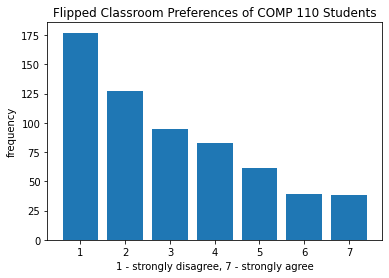

In [9]:
## Graphical Representation
from matplotlib import pyplot as plt


plot_data = key_order(plot_data)

plt.bar(range(1, 8), list(plot_data.values()))
plt.title("Flipped Classroom Preferences of COMP 110 Students")
plt.xticks(range(1, 8), list(plot_data.keys()))
plt.xlabel("1 - strongly disagree, 7 - strongly agree")
plt.ylabel("frequency")
plt.show

## Analysis
According to my analysis of responses to the flipped_class survey question, we see that a majority of students would not be willing to watch videos and complete lessons as homework over the weekend and Mondays to prepare for Tuesday lectures if they were in person. Specifically, 399/620 or 64.35% of responses were 1, 2, or 3, indicating general disagreement with the notion proposed in the survey question. Futhermore, 138/620 or 22.26% of responses were 5, 6, or 7, representing nearly 1/3 of the response count of those who expressed disagreement, supporting the notion that students disgree with the proposed change. 



## Conclusion
This analysis has provided insight into student preferences for a flipped classroom instruction style for COMP 110. I have outlined some confounding factors and potential reasons for the responses of students to paint a broader picture of our data. My original 

Observations:
1) In my opinion, this question could imply to a respondant that more work will be involved in COMP 110 if this adjustment were to occur. This inference could be made because we currently watch long lesson videos in place of a synchronous, in-person Tuesday lectures. If we were to continue watching videos in addition to practicing in class on Tuesday, students may disgree with adding more work in the form of in-class practice on Tuesday in addition to asynchronous lessons. Perhaps if the question were to include a clause that overall workload would remain the same through a reduction of videos to compensate for in-person class, the distribution would possibly take a more normal form as the workload factor would diminish. However, the true implementation of the proposed adjustment would determine if workload would truly increase overall or not, meaning this clause could be pointless and inaccurate.
2) Regardless of my assertion in the comment above, we see that more students are in favor of retaining the current structure of COMP 110. This could result from the advantages of the current system, including lower logistic constraints of attending class once per-week, greater flexibility in our instruction times (asynchronous), and perhaps an aversion to more structured in-class practice, regardless of its effectiveness as a teaching tool.

Potential Costs and Tradeoffs:
Considering the implementation of a flipped classroom, maintaining the current structure is easier on the instructors as recorded videos take the place for lecturing in class, reducing necessary effort. The extent of a flipped classroon is a spectrum, and current structure of COMP 110 is mostly a flipped classroom. However, the proposed shift would require more planning from the instructors and greater effort for students to watch videos in tandem with an an additional in-person lecture. However, the results indicate that students prefer maintaining the current structure, so these changes would additionally go against student preferences, representing an additional trade-off. Additionally, stepping away from a flipped classroom means the lesson videos would be underutilized which would be a loss of useful resources for the course.

Refinements:
To improve the quality of insights regarding the ideal class structure, the instructors could propose experiments where different 'levels' or extents of flipped classrooms are implemented in different sections. For example, one section or semester could be the current structure while the next section/semester uses the proposed implementation. You could then analyze student performance and poll their preferences and experiences across sections to determine which structure is ideal to maintain. However, this would introduce inequality among sections which could be concerning, so experiments could be conducted between semesters rather than between sections to maintain equality between sections. 
